Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [2]:
NAME = "Helen Ng"

## Assignment 1 - Data Cleaning & Exploration
**(30 points total)**

For this assignment, we will use an open dataset with data on various types of cereal and the corresponding customer ratings. Use the .csv file provided.

Create a dataframe by importing the file into Jupyter, and complete the tasks below. Be sure to show your Python code. You will not be graded on code efficiency, but your code should return a correct answer.

**Question 1.**  _(4 points)_
* Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

**Question 2.**  _(2 points)_
* Identify the negative values in the data set and replace them with the median value for that column. 

**Question 3.** _(5 points)_
* Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1. 

**Question 4.**  _(5 points)_
* Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

**Question 5.** _(2 points)_
* Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

**Question 6.** _(2 points)_
* Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

**Question 7.** _(2 points)_
* Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

**Question 8.** _(3 points)_
* Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

**Question 9.** _(3 points)_
* Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy. 

**Question 10.** _(1 point)_
* Which shelf has the most healthy cereals?

**Question 11.** _(1 point)_
* Based on the analysis conducted, what can you conclude about the cereal data set?

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

cereal_df = pd.read_csv('C:/Users/nghel/Downloads/cereal.csv')
cereal_df.info()
cereal_df.head()
cereal_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [8]:
# 1 Cereal Categorization

import pandas as pd 
import numpy as np
cereal_df = pd.read_csv('C:/Users/nghel/Downloads/cereal.csv')

def categorize_cereal(name):

    name_lower = name.lower() # Convert cereal names to lowercase for easier matching
   
    # Checking for each category in priority order 
    if 'bran' in name_lower:
        return 'Bran'
    elif 'wheat' in name_lower:
        return 'Wheat'
    elif 'fiber' in name_lower or 'fibre' in name_lower:
        return 'Fiber'
    elif 'protein' in name_lower:
        return 'Protein'
    elif 'crunch' in name_lower or 'crisp' in name_lower or 'cluster' in name_lower:
        return 'Crunch'
    elif 'corn' in name_lower:
        return 'Corn'
    elif 'nut' in name_lower or 'almond' in name_lower or 'peanut' in name_lower:
        return 'Nut'
    elif 'rice' in name_lower:
        return 'Rice'
    else: 
        return 'Other'

cereal_df['Type of Cereal'] = cereal_df['name'].copy() # Creating new 'Type of Cereal' column by copying 'name' column
cereal_df['Type of Cereal'] = cereal_df['name'].apply(categorize_cereal) # Categorizing cereal based on names 
print(cereal_df[['name','Type of Cereal']].head(10)) # Display sample of cereal names and categorizations


                        name Type of Cereal
0                  100% Bran           Bran
1          100% Natural Bran           Bran
2                   All-Bran           Bran
3  All-Bran with Extra Fiber           Bran
4             Almond Delight            Nut
5    Apple Cinnamon Cheerios          Other
6                Apple Jacks          Other
7                    Basic 4          Other
8                  Bran Chex           Bran
9                Bran Flakes           Bran


In [9]:
# 2 Replace negative values 

import pandas as pd
import numpy as np
cereal_df = pd.read_csv('C:/Users/nghel/Downloads/cereal.csv')

#Identifying negative values in each column
negative_found = False
for column in cereal_df.columns:
    if cereal_df[column].dtype in ['int64', 'float64']: # Only checking numeric columns
        negative_count = (cereal_df[column] < 0).sum()
        if negative_count > 0:
            negative_found = True 
            print(f"\n{column}:")
            print(f" Found{negative_count} negative value(s)")
            print(f" Negative values:{cereal_df[cereal_df[column] < 0][column].values}")
            print(f" Rows with negative values: {cereal_df[cereal_df[column] < 0].index.tolist()}")

# Identifying median values for columns with negative values
for column in cereal_df.columns:
    if cereal_df[column].dtype in ['int64', 'float64']:
        negative_count = (cereal_df[column] < 0).sum()
        if negative_count > 0:
            median_value = cereal_df[cereal_df[column] >= 0][column].median()
            print(f"\n{column}:")
            print(f" Median value (excluding negatives): {median_value}")
            print(f" Replacing {negative_count} negative value(s) with {median_value}")

            cereal_df.loc[cereal_df[column] < 0, column] = median_value # Replacing negative values with median 

# Verifying that no negative values remain
still_negative = False
for column in cereal_df.columns:
    if cereal_df[column].dtype in ['int64', 'float64']:
        negative_count = (cereal_df[column] < 0).sum()
        if negative_count > 0:
            still_negative = True
            print(f"{column}: {negative_count} negative values still present")
if not still_negative:
    print("No negative values remain in dataset")

# Ensuring that negative values were placed with median 
print("\nRow 4 (Almond Delight - had negative potass):")
print(cereal_df.iloc[4])

print("n\nRow 20 (Cream of Wheat - had negative potass):")
print(cereal_df.iloc[20])

print("\nRow 57 (Quaker Oatmeal - had negative carbo annd sugars):")
print(cereal_df.iloc[57])



carbo:
 Found1 negative value(s)
 Negative values:[-1.]
 Rows with negative values: [57]

sugars:
 Found1 negative value(s)
 Negative values:[-1]
 Rows with negative values: [57]

potass:
 Found2 negative value(s)
 Negative values:[-1 -1]
 Rows with negative values: [4, 20]

carbo:
 Median value (excluding negatives): 14.5
 Replacing 1 negative value(s) with 14.5

sugars:
 Median value (excluding negatives): 7.0
 Replacing 1 negative value(s) with 7.0

potass:
 Median value (excluding negatives): 90.0
 Replacing 2 negative value(s) with 90.0
No negative values remain in dataset

Row 4 (Almond Delight - had negative potass):
name        Almond Delight
mfr                      R
type                     C
calories               110
protein                  2
fat                      2
sodium                 200
fiber                  1.0
carbo                 14.0
sugars                   8
potass                  90
vitamins                25
shelf                    3
weight          

In [10]:
# 3 Standardize weight column to 1

import pandas as pd
import numpy as np
cereal_df = pd.read_csv('C:/Users/nghel/Downloads/cereal.csv')

def standardize_weight(df): 
    df_standardized = df.copy()

    nutritional_columns = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']

# For each row, divide nutritional values by the weight
    for column in nutritional_columns: 
        df_standardized[column] = df_standardized[column]/df_standardized['weight']
    print("Nutritional columns adjusted")

# Divide weight by itself to get 1
    print("\nStandardizing weight column to 1") 
    df_standardized['weight'] = df_standardized['weight']/df_standardized['weight']
    print("Weight column standardized")

    return df_standardized

# Applying the standardization function
cereal_df_standardized = standardize_weight(cereal_df)

print("\nStandardized data (first 10 rows):")
print(cereal_df_standardized[['name', 'weight', 'calories', 'protein', 'fat', 'fiber', 'sugars']].head(10))



Nutritional columns adjusted

Standardizing weight column to 1
Weight column standardized

Standardized data (first 10 rows):
                        name  weight    calories   protein       fat  \
0                  100% Bran     1.0   70.000000  4.000000  1.000000   
1          100% Natural Bran     1.0  120.000000  3.000000  5.000000   
2                   All-Bran     1.0   70.000000  4.000000  1.000000   
3  All-Bran with Extra Fiber     1.0   50.000000  4.000000  0.000000   
4             Almond Delight     1.0  110.000000  2.000000  2.000000   
5    Apple Cinnamon Cheerios     1.0  110.000000  2.000000  2.000000   
6                Apple Jacks     1.0  110.000000  2.000000  0.000000   
7                    Basic 4     1.0   97.744361  2.255639  1.503759   
8                  Bran Chex     1.0   90.000000  2.000000  1.000000   
9                Bran Flakes     1.0   90.000000  3.000000  0.000000   

       fiber     sugars  
0  10.000000   6.000000  
1   2.000000   8.000000  
2  

In [11]:
# 4 Categorize cereals as healthy or unhealthy

import pandas as pd
import numpy as np
cereal_df = pd.read_csv('C:/Users/nghel/Downloads/cereal.csv')

print("\nCriteria for 'Healthy' cereals:")
print("Calories < 100")
print("Sodium < 150")
print("Sugars < 9")
print("Fiber > 3")
print("Protein > 2")
print("\nAll other cereals are classified as 'Unhealthy'")

# Categorize cereals as healthy or unhealthy
def categorize_health(row): 
    if (row['calories'] < 100 and
        row['sodium'] < 150 and
        row['sugars'] < 9 and
        row['fiber'] > 3 and 
        row['protein'] > 2):
        return 'Healthy'
    else: 
        return 'Unhealthy'

# Create new 'Health Category' column 
cereal_df['Health Category'] = cereal_df.apply(categorize_health, axis = 1)

print(cereal_df[['name', 'calories', 'sodium', 'sugars', 'fiber', 'protein', 'Health Category']].head(10))


Criteria for 'Healthy' cereals:
Calories < 100
Sodium < 150
Sugars < 9
Fiber > 3
Protein > 2

All other cereals are classified as 'Unhealthy'
                        name  calories  sodium  sugars  fiber  protein  \
0                  100% Bran        70     130       6   10.0        4   
1          100% Natural Bran       120      15       8    2.0        3   
2                   All-Bran        70     260       5    9.0        4   
3  All-Bran with Extra Fiber        50     140       0   14.0        4   
4             Almond Delight       110     200       8    1.0        2   
5    Apple Cinnamon Cheerios       110     180      10    1.5        2   
6                Apple Jacks       110     125      14    1.0        2   
7                    Basic 4       130     210       8    2.0        3   
8                  Bran Chex        90     200       6    4.0        2   
9                Bran Flakes        90     210       5    5.0        3   

  Health Category  
0         Healthy  
1 

In [12]:
# 5 Percentage of cereals that each manufacturer produces that are healthy

import pandas as pd
import numpy as np
cereal_df = pd.read_csv('C:/Users/nghel/Downloads/cereal.csv')

# Categorizing cereals as healthy or unhealthy
def categorize_health(row):
    if (row['calories'] < 100 and
        row['sodium'] < 150 and 
        row['sugars'] < 9 and 
        row['fiber'] > 3 and 
        row['protein'] > 2):
        return 'Healthy'
    else:
        return 'Unhealthy'

# Applying health categorization
cereal_df['Health Category'] = cereal_df.apply(categorize_health, axis = 1)

print("PERCENTAGE OF HEALTHY CEREALS BY MANUFACTURER")

manufacturer_names = {
    'A': 'American Home Food Products',
    'G': 'General Mills',
    'K': 'Kelloggs',
    'N': 'Nabisco',
    'P': 'Post',
    'Q': 'Quaker Oats',
    'R': 'Ralston Purina'
}

# Calculating statistics by manufacturer 
mfr_stats = cereal_df.groupby('mfr').agg({
    'name': 'count', 
    "Health Category": lambda x: (x == 'Healthy').sum() # Count of healthy cereals
}).rename(columns = {'name': 'Total Cereals', 'Health Category': 'Healthy Cereals'})

# Calculating percentage of healthy cereals by manufacturer
mfr_stats['Percentage Healthy'] = (mfr_stats['Healthy Cereals']/mfr_stats['Total Cereals'] * 100).round(2)

# Adding manufacturer full names
mfr_stats['Manufacturer Name'] = mfr_stats.index.map(manufacturer_names)

# Sorting by percentage of healthy cereals
mfr_stats = mfr_stats.sort_values('Percentage Healthy', ascending = False)

# Display summary table of % of healthy cereals grouped by manufacturer
print("SUMMARY TABLE")
print("-"*70)
print("\n{:<5} {:<35} {:<8} {:<8} {:<12}".format(
    "Code", "Manufacturer", "Total", "Healthy", "% Healthy"))
print("-"*70)

for mfr, row in mfr_stats.iterrows():
    print("{:<5} {:<35} {:<8} {:<8} {:<12}".format(
        mfr,
        row['Manufacturer Name'],
        row['Total Cereals'],
        row['Healthy Cereals'],
        f"{row['Percentage Healthy']:.2f}%"
    ))

# Nabisco has the highest percentage of healthy cereals at 33.3%

PERCENTAGE OF HEALTHY CEREALS BY MANUFACTURER
SUMMARY TABLE
----------------------------------------------------------------------

Code  Manufacturer                        Total    Healthy  % Healthy   
----------------------------------------------------------------------
N     Nabisco                             6        2        33.33%      
K     Kelloggs                            23       1        4.35%       
A     American Home Food Products         1        0        0.00%       
G     General Mills                       22       0        0.00%       
P     Post                                9        0        0.00%       
Q     Quaker Oats                         8        0        0.00%       
R     Ralston Purina                      8        0        0.00%       


In [13]:
# 6 Average, minimum and maximum ratings for healthy vs. unhealthy cereals

import pandas as pd
import numpy as np
cereal_df = pd.read_csv('C:/Users/nghel/Downloads/cereal.csv')

# Categorizing cereal as healthy or unhealthy
def categorize_health(row):
    if (row['calories'] < 100 and
        row['sodium'] < 150 and
        row['sugars'] < 9 and
        row['fiber'] > 3 and
        row['protein'] > 2):
        return 'Healthy'
    else:
        return 'Unhealthy'

# Applying health categorization
cereal_df['Health Category'] = cereal_df.apply(categorize_health, axis = 1)

print("Ratings Analysis: Healthy vs Unhealthy Cereals")
print("-"*70)

# Calculating avg, max, and min ratings for healthy and unhealthy cereals
rating_stats = cereal_df.groupby('Health Category')['rating'].agg([
    ('Average', 'mean'),
    ('Minimum', 'min'),
    ('Maximum', 'max')
]).round(2)

print("Summary Statistics")
print("-"*70)
print(rating_stats)

Ratings Analysis: Healthy vs Unhealthy Cereals
----------------------------------------------------------------------
Summary Statistics
----------------------------------------------------------------------
                 Average  Minimum  Maximum
Health Category                           
Healthy            78.86    68.40     93.7
Unhealthy          41.20    18.04     72.8


In [14]:
# 7 Average, minimum, and maximum ratings for each type of cereal

import pandas as pd
import numpy as np
cereal_df = pd.read_csv('C:/Users/nghel/Downloads/cereal.csv')

# Categorizing cereal by type based on keywords in name
def categorize_cereal(name):

    name_lower = name.lower() # Convert cereal names to lowercase for easier matching
   
    # Checking for each category in priority order 
    if 'bran' in name_lower:
        return 'Bran'
    elif 'wheat' in name_lower:
        return 'Wheat'
    elif 'fiber' in name_lower or 'fibre' in name_lower:
        return 'Fiber'
    elif 'protein' in name_lower:
        return 'Protein'
    elif 'crunch' in name_lower or 'crisp' in name_lower or 'cluster' in name_lower:
        return 'Crunch'
    elif 'corn' in name_lower:
        return 'Corn'
    elif 'nut' in name_lower or 'almond' in name_lower or 'peanut' in name_lower:
        return 'Nut'
    elif 'rice' in name_lower:
        return 'Rice'
    else: 
        return 'Other'

# Applying cereal type categorization
cereal_df['Type of Cereal'] = cereal_df['name'].apply(categorize_cereal)

print("Ratings analysis by cereal type")
print("-"*70)

# Calculating avg, max, and min ratings by cereal type
type_rating_stats = cereal_df.groupby('Type of Cereal')['rating'].agg([
    ('Average', 'mean'),
    ('Minimum', 'min'),
    ('Maximum', 'max'),
]).round(2)

print("Summary Statstics")
print("-"*70)
print(type_rating_stats)
        

Ratings analysis by cereal type
----------------------------------------------------------------------
Summary Statstics
----------------------------------------------------------------------
                Average  Minimum  Maximum
Type of Cereal                           
Bran              50.71    28.59    93.70
Corn              40.48    35.78    45.86
Crunch            31.96    18.04    46.90
Fiber             40.92    40.92    40.92
Nut               40.74    31.07    53.37
Other             37.49    21.87    55.33
Rice              47.77    40.56    60.76
Wheat             56.33    36.18    72.80


Cereal type distribution by manufacturer
----------------------------------------------------------------------
Crosstab: Cereal Type Count by Manufacturer
Type of Cereal  Bran  Corn  Crunch  Fiber  Nut  Other  Rice  Wheat
mfr                                                               
A                  0     0       0      0    0      1     0      0
G                  2     1       3      0    1     12     0      3
K                  5     2       4      0    2      7     1      2
N                  2     0       0      0    0      0     0      4
P                  2     0       1      1    2      3     0      0
Q                  1     0       1      0    0      4     1      1
R                  1     1       0      0    2      2     1      1
Manufacturer Full Names:
 A = American Home Food Products
 G = General Mills
 K = Kelloggs
 N = Nabisco
 P = Post
 Q = Quaker Oats
 R = Ralston Purina


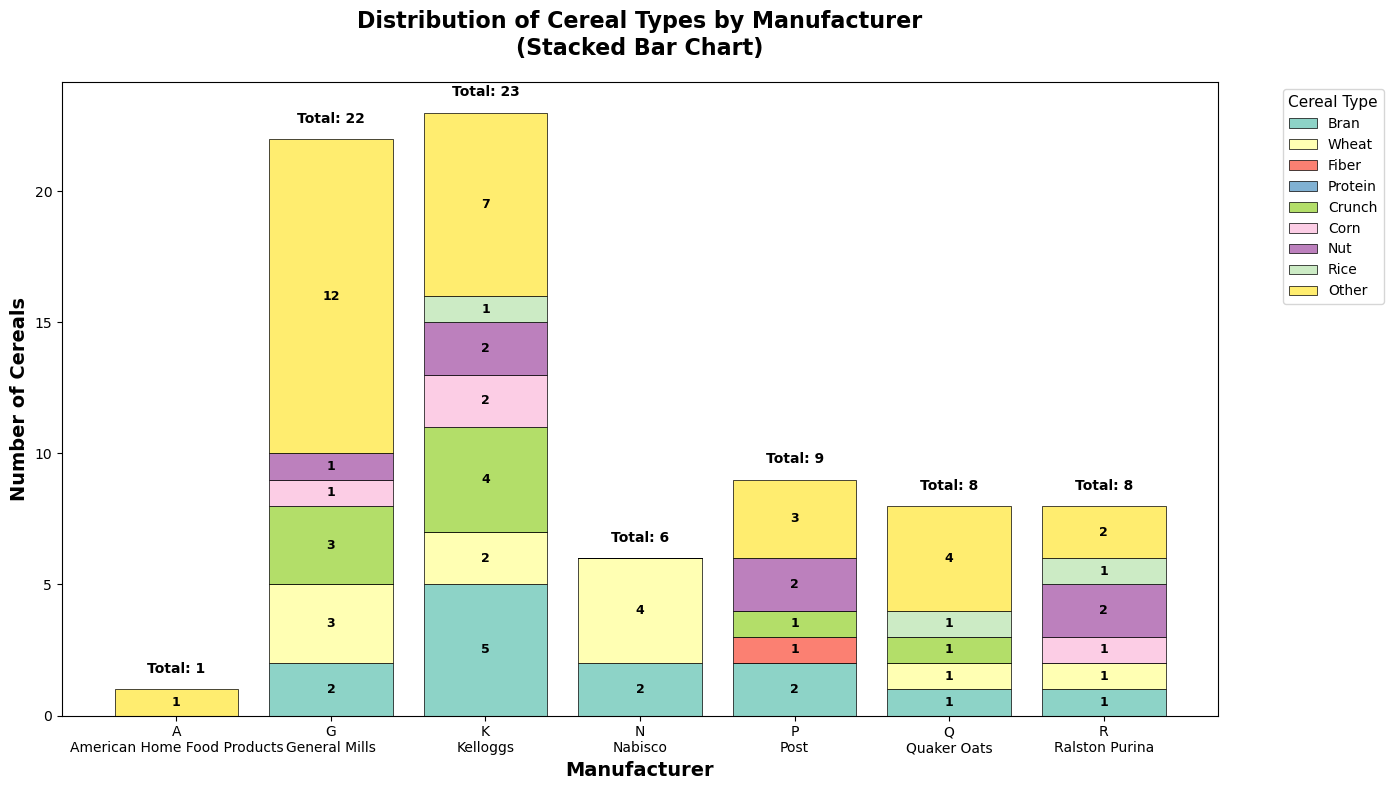

In [15]:
# 8 Stacked bar chart that shows how many of each type of cereal each manufacturer produces

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cereal_df = pd.read_csv('C:/Users/nghel/Downloads/cereal.csv')

# Categorizing cereal by type based on keywords in name
def categorize_cereal(name):

    name_lower = name.lower() # Convert cereal names to lowercase for easier matching
   
    # Checking for each category in priority order 
    if 'bran' in name_lower:
        return 'Bran'
    elif 'wheat' in name_lower:
        return 'Wheat'
    elif 'fiber' in name_lower or 'fibre' in name_lower:
        return 'Fiber'
    elif 'protein' in name_lower:
        return 'Protein'
    elif 'crunch' in name_lower or 'crisp' in name_lower or 'cluster' in name_lower:
        return 'Crunch'
    elif 'corn' in name_lower:
        return 'Corn'
    elif 'nut' in name_lower or 'almond' in name_lower or 'peanut' in name_lower:
        return 'Nut'
    elif 'rice' in name_lower:
        return 'Rice'
    else: 
        return 'Other'

# Applying cereal type categorization
cereal_df['Type of Cereal'] = cereal_df['name'].apply(categorize_cereal)

print("Cereal type distribution by manufacturer")
print("-"*70)

# Getting manufacturer full names
manufacturer_names = {
    'A': 'American Home Food Products',
    'G': 'General Mills',
    'K': 'Kelloggs',
    'N': 'Nabisco',
    'P': 'Post',
    'Q': 'Quaker Oats',
    'R': 'Ralston Purina'
}

# Creating table of cereal type counts by manufacturer
type_by_mfr = pd.crosstab(cereal_df['mfr'], cereal_df['Type of Cereal'])

print("Crosstab: Cereal Type Count by Manufacturer")
print(type_by_mfr)
print("Manufacturer Full Names:")
for code, name in manufacturer_names.items():
    print(f" {code} = {name}")

# Creating the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8)) 
cereal_types = ['Bran', 'Wheat', 'Fiber', 'Protein', 'Crunch', 'Corn', 'Nut', 'Rice', 'Other']
colors = plt.cm.Set3(np.linspace(0, 1, len(cereal_types)))
color_map = {cereal_type: colors[i] for i, cereal_type in enumerate(cereal_types)}

# Making sure that all cereal types are in dataframe
for cereal_type in cereal_types:
    if cereal_type not in type_by_mfr.columns:
        type_by_mfr[cereal_type] = 0
type_by_mfr = type_by_mfr[cereal_types]

bottom = np.zeros(len(type_by_mfr))

for cereal_type in cereal_types:
    values = type_by_mfr[cereal_type].values
    ax.bar(type_by_mfr.index, values, bottom=bottom,
           label = cereal_type, color=color_map[cereal_type],
           edgecolor='black', linewidth=0.5)

    for i, (mfr, count) in enumerate(zip(type_by_mfr.index, values)):
        if count > 0:
            y_pos = bottom[i] + count / 2
            ax.text(i, y_pos, str(int(count)),
                ha = 'center', va='center', fontsize = 9, fontweight='bold')
    bottom += values

# Customizing the chart
ax.set_xlabel('Manufacturer', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Cereals', fontsize=14, fontweight='bold')
ax.set_title('Distribution of Cereal Types by Manufacturer\n(Stacked Bar Chart)',
             fontsize=16, fontweight='bold', pad=20)

# Setting x-axis labels with manufacturer names
x_labels = [f"{mfr}\n{manufacturer_names[mfr]}" for mfr in type_by_mfr.index]
ax.set_xticks(range(len(type_by_mfr.index)))
ax.set_xticklabels(x_labels, fontsize=10)

# Adding a legend
ax.legend(title='Cereal Type', bbox_to_anchor=(1.05, 1), loc='upper left',
          fontsize=10, title_fontsize=11)

# Add total count on top of each bar
totals = type_by_mfr.sum(axis=1)
for i, (mfr, total) in enumerate(zip(type_by_mfr.index, totals)):
    ax.text(i, total + 0.5, f'Total: {int(total)}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('C:/Users/nghel/Downloads/stacked_bar_cereal_types_by_manufacturer.png',
            dpi=300, bbox_inches='tight')
plt.show()
    

3D Scatterplot: Rating vs Calories (colored by Health Category)
----------------------------------------------------------------------


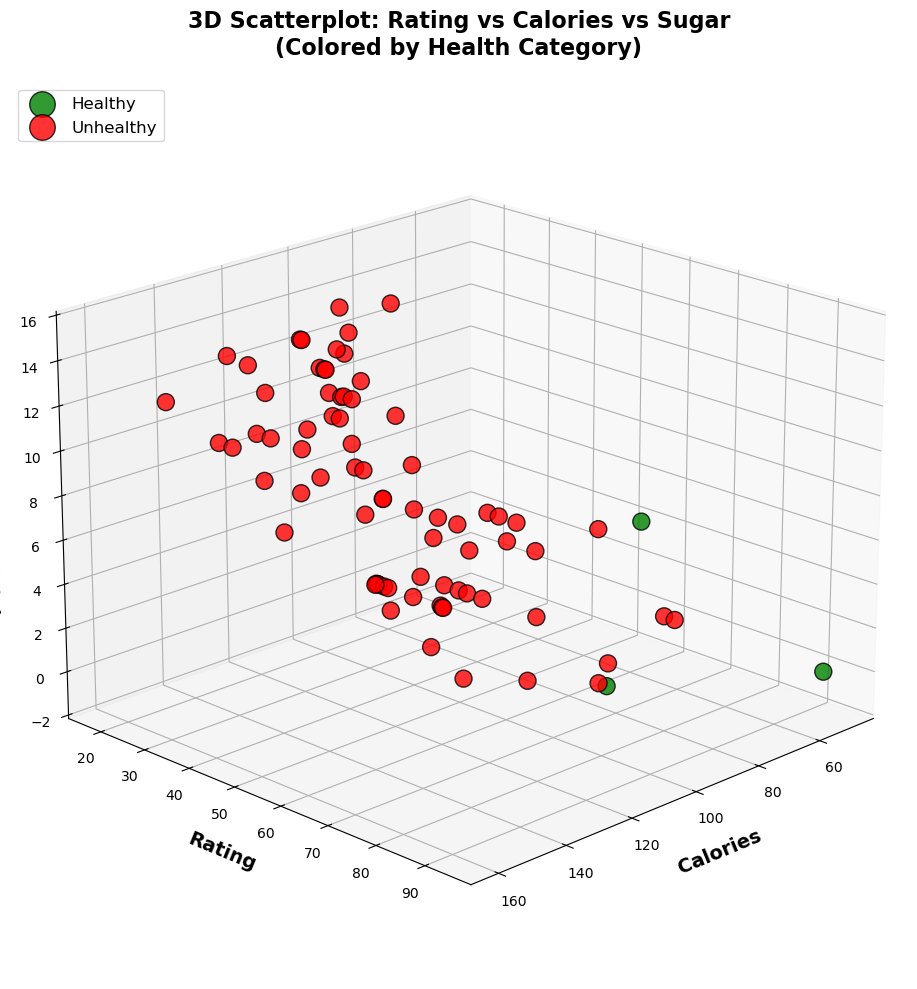

In [16]:
# 9 3D scatterplot for the relationship between rating and colories

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
cereal_df = pd.read_csv('C:/Users/nghel/Downloads/cereal.csv')

# Categorizing cereals as healthy or unhealthy
def categorize_health(row):
    if (row['calories'] < 100 and
        row['sodium'] < 150 and 
        row['sugars'] < 9 and 
        row['fiber'] > 3 and 
        row['protein'] > 2):
        return 'Healthy'
    else:
        return 'Unhealthy'

# Applying health categorization
cereal_df['Health Category'] = cereal_df.apply(categorize_health, axis = 1)

# Separating data by health category
healthy = cereal_df[cereal_df['Health Category'] == 'Healthy']
unhealthy = cereal_df[cereal_df['Health Category'] == 'Unhealthy']

print("3D Scatterplot: Rating vs Calories (colored by Health Category)")
print("-"*70)

# Creating the 3D scatterplot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(healthy['calories'], healthy['rating'], healthy['sugars'],
           c='green', marker='o', s=150, alpha=0.8, edgecolors='black',
           linewidth=1, label='Healthy')

ax.scatter(unhealthy['calories'], unhealthy['rating'], unhealthy['sugars'],
           c='red', marker='o', s=150, alpha=0.8, edgecolors='black',
           linewidth=1, label='Unhealthy')

# Adding labels and title
ax.set_xlabel('Calories', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Rating', fontsize=14, fontweight='bold', labelpad=10)
ax.set_zlabel('Sugar Content (g)', fontsize=14, fontweight='bold', labelpad=10)
ax.set_title('3D Scatterplot: Rating vs Calories vs Sugar\n(Colored by Health Category)',
             fontsize=16, fontweight='bold', pad=20)

# Adding a legend
ax.legend(loc='upper left', fontsize=12, markerscale=1.5)

# Adding grid
ax.grid(True, alpha=0.3)

# Ajusting viewing angle
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.savefig('C:/Users/nghel/Downloads/3d_scatterplot_rating_calories_health.png',
            dpi=300, bbox_inches='tight')
plt.show()

# Conclusions: There is a negative correlation between carlories and ratings (Higher calories are associated with lower ratings)

In [17]:
# 10 Healthy cereals by shelf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cereal_df = pd.read_csv('C:/Users/nghel/Downloads/cereal.csv')

# Categorizing cereals as healthy or unhealthy
def categorize_health(row):
    if (row['calories'] < 100 and
        row['sodium'] < 150 and 
        row['sugars'] < 9 and 
        row['fiber'] > 3 and 
        row['protein'] > 2):
        return 'Healthy'
    else:
        return 'Unhealthy'

# Applying health categorization
cereal_df['Health Category'] = cereal_df.apply(categorize_health, axis = 1)

print("Healthy Cereals by Shelf Location")
print("-"*80)

# Counting cereals by shelf and health category
shelf_health_counts = pd.crosstab(cereal_df['shelf'], cereal_df['Health Category'])
print(shelf_health_counts)

# Conclusion: shelf 3 has the most healthy cereals

Healthy Cereals by Shelf Location
--------------------------------------------------------------------------------
Health Category  Healthy  Unhealthy
shelf                              
1                      1         19
2                      0         21
3                      2         34


In [18]:
# Conclusions about cereal data set

# Most cereals are unhealthy (only 3.9% of cereals in this dataset were considered healthy
# Healthy cereals are rated much higher (average rating of 78.86 compared to 41.20 for unhealthy cereals). Consumers seem to value nutritional quality
# 5 manufacturers make zero healthy cereals: General Mills, Post, Quaker Oats, Ralston Purina, American Home
# Wheat and bran cereals have the highest average ratings
# Ratings reflect nutritional value and not taste preference